<a href="https://colab.research.google.com/github/river6907/Data-Mining/blob/main/13_1_%EC%86%8C%EC%85%9C_%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving asoiaf-all-edges.csv to asoiaf-all-edges.csv
Saving asoiaf-all-nodes.csv to asoiaf-all-nodes.csv
Saving facebook_combined.txt.gz to facebook_combined.txt.gz
Saving Pokemon.csv to Pokemon.csv


## Pokemon 데이터 분석 ¶

In [4]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Pokemon.csv')
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
#Network analysis
g = nx.Graph()
g = nx.from_pandas_edgelist(data, source = 'Name', target = 'Type 1')
print(nx.info(g))

Graph with 818 nodes and 800 edges


networkx라는 툴 사용해서 각 카테고리별 네트워크 그려보기

spring_layout 뭔가 중요해 보인다.

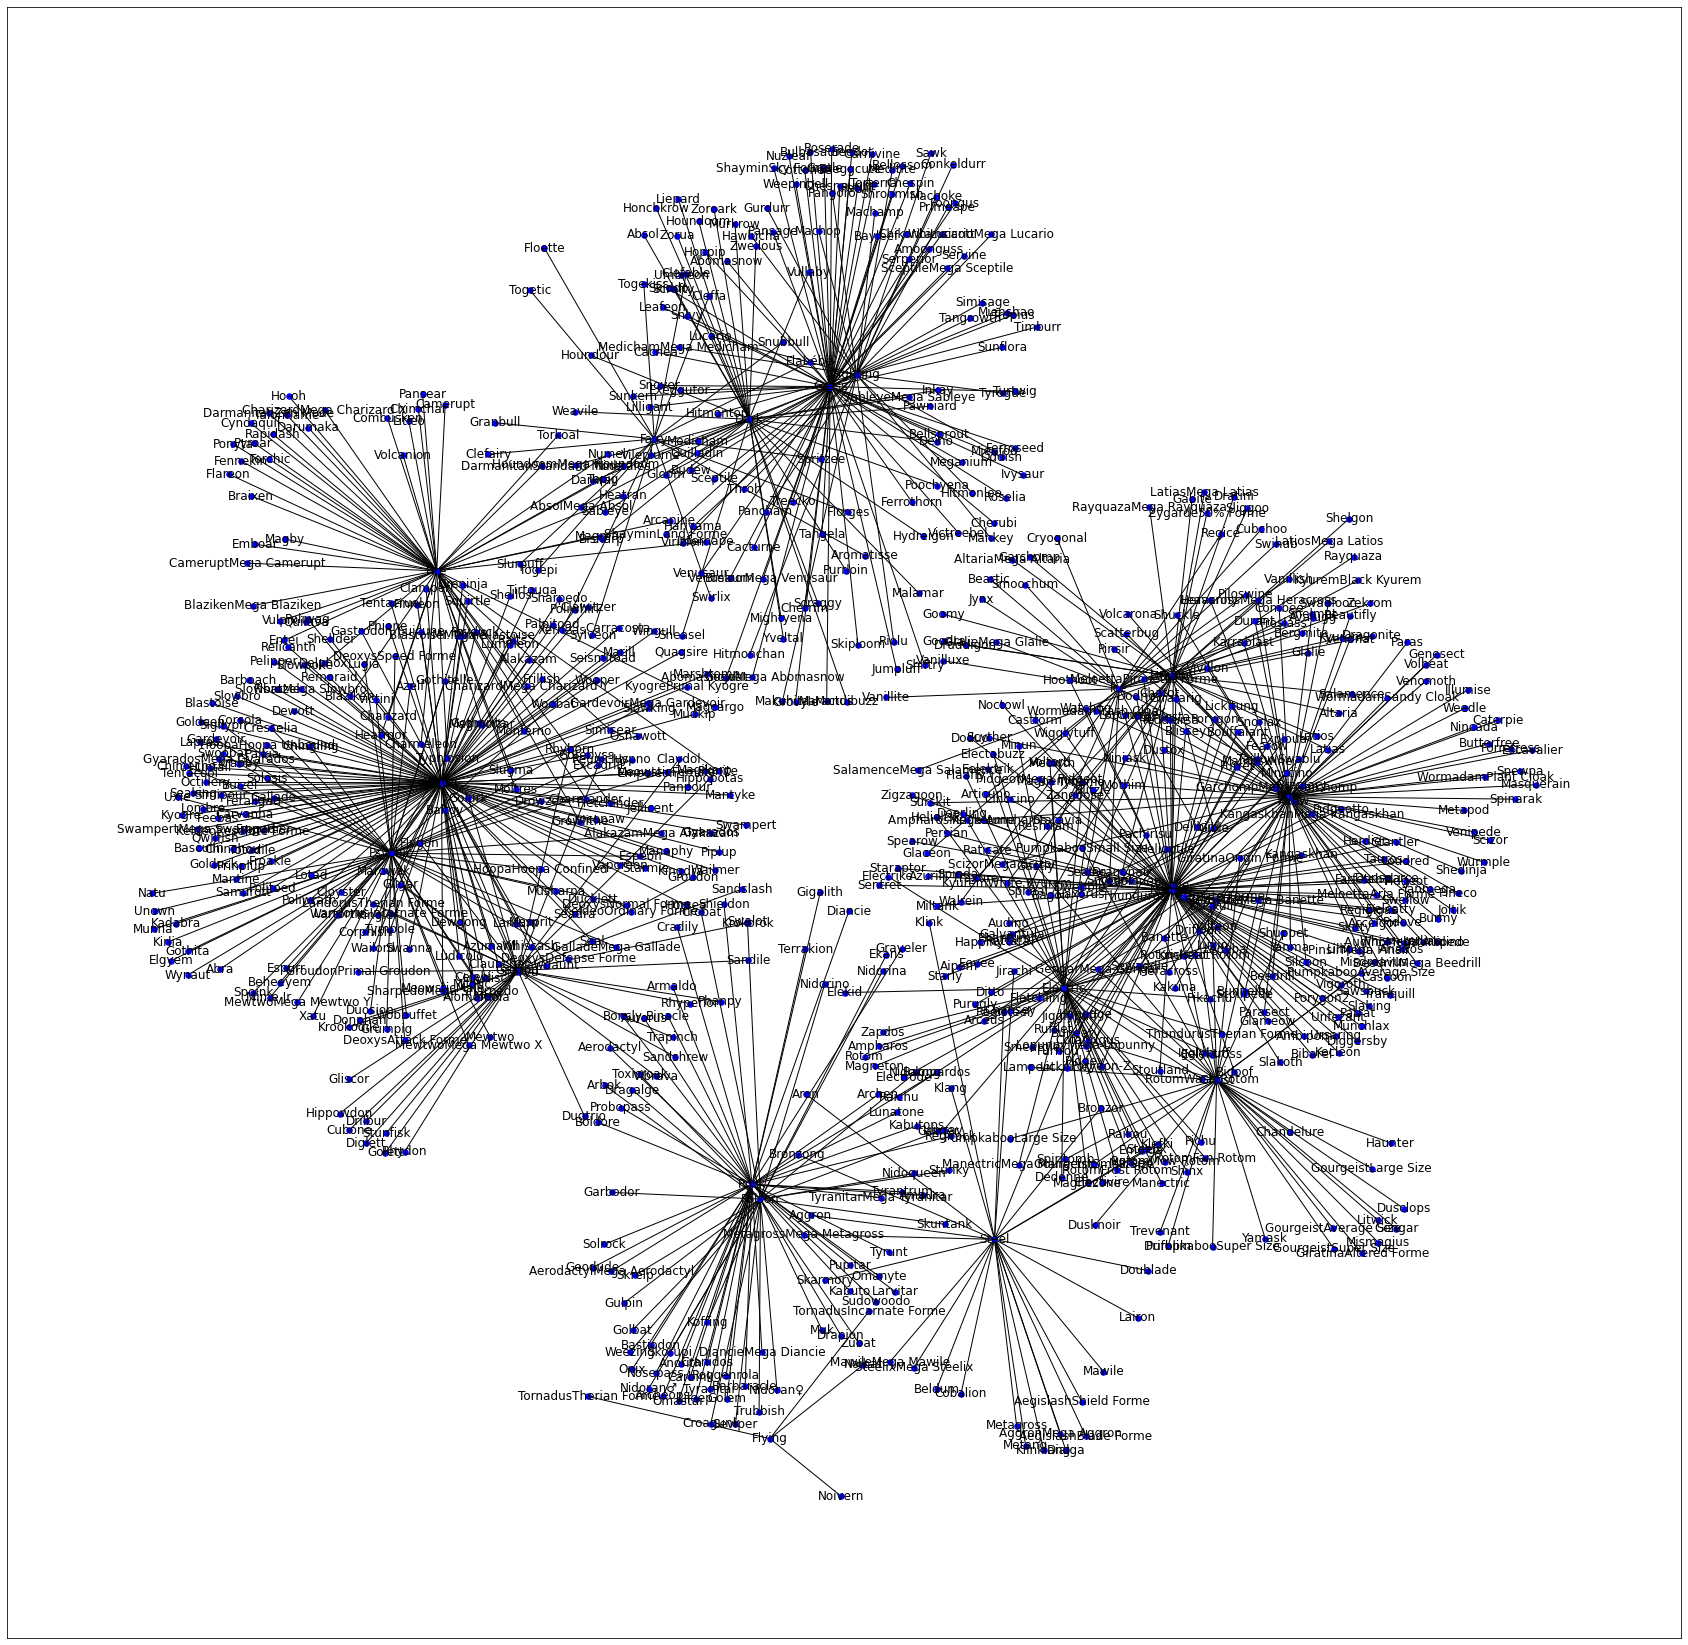

In [7]:
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g, pos, node_size = 30, node_color = 'blue')
plt.show()

[참고] spring_layout 함수 (reference ->
https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
(https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html))
* 노드의 위치를 계산하기 위해 노드와 에지를 고려
* 단점은 계산 비용이 높음 (속도가 느림)

## 왕좌의 게임 등장인물 관계망 분석

In [8]:
df = pd.read_csv("asoiaf-all-edges.csv")
df

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [9]:
G = nx.from_pandas_edgelist(df, source='Source', target='Target')

print(len(G.nodes())) #797
print(len(G.edges())) #2824

796
2823


연결 중심성!!  degree_centrality

In [10]:
deg_cen = nx.degree_centrality(G)

In [11]:
deg_cen

{'Addam-Marbrand': 0.01509433962264151,
 'Aegon-Frey-(son-of-Stevron)': 0.005031446540880503,
 'Aegon-I-Targaryen': 0.011320754716981131,
 'Aegon-Targaryen-(son-of-Rhaegar)': 0.018867924528301886,
 'Aegon-V-Targaryen': 0.0012578616352201257,
 'Aemon-Targaryen-(Dragonknight)': 0.0012578616352201257,
 'Aemon-Targaryen-(Maester-Aemon)': 0.03270440251572327,
 'Aenys-Frey': 0.005031446540880503,
 'Aeron-Greyjoy': 0.018867924528301886,
 'Aerys-I-Targaryen': 0.0012578616352201257,
 'Aerys-II-Targaryen': 0.023899371069182388,
 'Aggar': 0.005031446540880503,
 'Aggo': 0.012578616352201257,
 'Alayaya': 0.005031446540880503,
 'Albett': 0.0037735849056603774,
 'Alebelly': 0.005031446540880503,
 'Alerie-Hightower': 0.0025157232704402514,
 'Alester-Florent': 0.00880503144654088,
 'Alla-Tyrell': 0.006289308176100628,
 'Allar-Deem': 0.0025157232704402514,
 'Allard-Seaworth': 0.0037735849056603774,
 'Alleras': 0.010062893081761006,
 'Alliser-Thorne': 0.018867924528301886,
 'Alyn': 0.006289308176100628,


In [12]:
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Tyrion-Lannister', 0.15345911949685534),
 ('Jon-Snow', 0.14339622641509434),
 ('Jaime-Lannister', 0.1270440251572327),
 ('Cersei-Lannister', 0.1220125786163522),
 ('Stannis-Baratheon', 0.11194968553459118)]

* Page Rank


In [13]:
page_rank = nx.pagerank(G)
sorted(page_rank.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Jon-Snow', 0.018999569248566855),
 ('Tyrion-Lannister', 0.018341232619311046),
 ('Jaime-Lannister', 0.015437447356269757),
 ('Stannis-Baratheon', 0.013648810781186758),
 ('Arya-Stark', 0.013432050115231258)]

* 근접 중심성 closeness centrality

In [14]:
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Tyrion-Lannister', 0.4763331336129419),
 ('Robert-Baratheon', 0.4592720970537262),
 ('Eddard-Stark', 0.455848623853211),
 ('Cersei-Lannister', 0.45454545454545453),
 ('Jaime-Lannister', 0.4519613416714042)]

* Between Centrality (매개 중심성)

In [15]:
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:5]

[('Jon-Snow', 0.1921196196835449),
 ('Tyrion-Lannister', 0.1621910961115984),
 ('Daenerys-Targaryen', 0.11841801916269204),
 ('Theon-Greyjoy', 0.11128331813470228),
 ('Stannis-Baratheon', 0.11013955266679566)]

# facebook network analysis
* data download --> Stanford Large Network Dataset Collection (http://snap.stanford.edu/data/index.html
(http://snap.stanford.edu/data/index.html))


In [16]:
facebook = pd.read_csv('facebook_combined.txt.gz', compression='gzip', sep=' ', names=['start_node', 'end_node'])
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


## 그래프 정의

In [17]:
G = nx.from_pandas_edgelist(facebook, 'start_node', 'end_node')

## 그래프 시각화

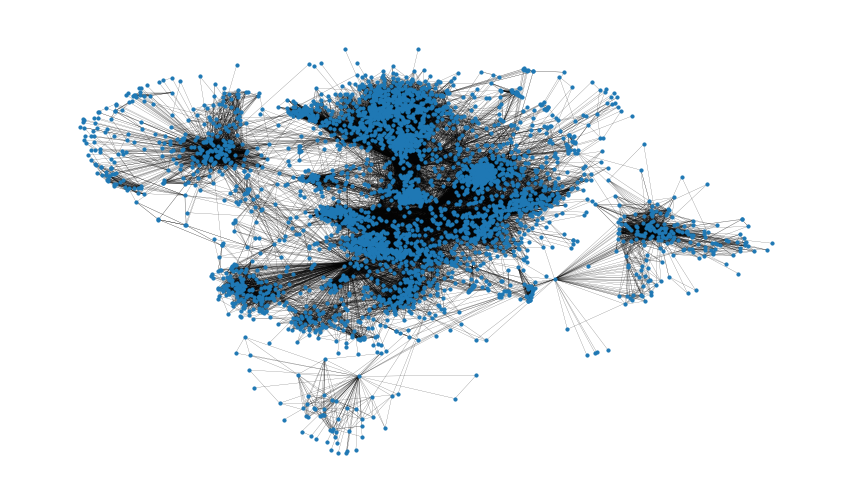

In [18]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

## 그래프 형상(topological attributes) 분석


In [19]:
print("Nodes : ", G.number_of_nodes())

Nodes :  4039


In [20]:
print("Edges : ", G.number_of_edges())

Edges :  88234


In [21]:
# maximum shortest paths --> diameter
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

8

In [22]:
# Compute the average shortest path length for each node
average_path_lengths = [
np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
# The average over all nodes
np.mean(average_path_lengths)

3.691592636562027

In [23]:
# create an array to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)
path_lengths

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Frequency (%)')

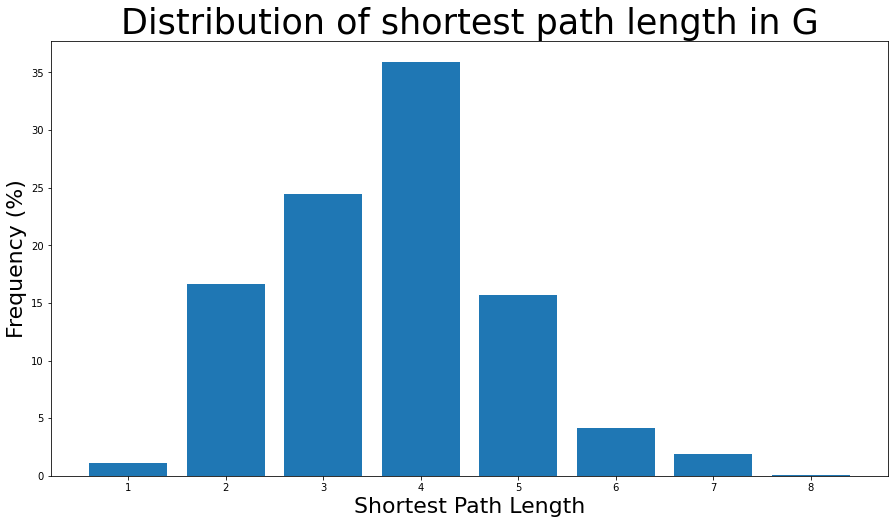

In [24]:
# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts
# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()
# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
'Distribution of shortest path length in G', fontdict ={'size': 35}, loc='center'
)
ax.set_xlabel('Shortest Path Length', fontdict ={'size': 22})
ax.set_ylabel('Frequency (%)', fontdict ={'size': 22})

## Centrality measures

In [25]:
deg_cen = nx.degree_centrality(G)
sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:10]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317),
 (1800, 0.06067360079247152),
 (1663, 0.058197127290737984)]

In [26]:
bet_cen = nx.betweenness_centrality(G)
sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:10]

[(107, 0.4805180785560152),
 (1684, 0.3377974497301992),
 (3437, 0.23611535735892905),
 (1912, 0.2292953395868782),
 (1085, 0.14901509211665306),
 (0, 0.14630592147442917),
 (698, 0.11533045020560802),
 (567, 0.09631033121856215),
 (58, 0.08436020590796486),
 (428, 0.06430906239323866)]

Checking the results:
* 0, 107, 1684, 1912, 3437 노드는 높은 연결중심성과 매개중심성을 가지는 'influence' 노드로 볼 수 있음
* 567, 1085, 698 노드는 매개중심성은 높지만 연결중심성은 높지 않음. 네트워크에서 이들 노드는 'popular users'는 아니지만
정보의 전달에 있어서 중요 노드로 볼 수 있음

In [27]:
clos_cen = nx.closeness_centrality(G)
sorted(clos_cen.items(), key=lambda x:x[1], reverse=True)[0:10]

[(107, 0.45969945355191255),
 (58, 0.3974018305284913),
 (428, 0.3948371956585509),
 (563, 0.3939127889961955),
 (1684, 0.39360561458231796),
 (171, 0.37049270575282134),
 (348, 0.36991572004397216),
 (483, 0.3698479575013739),
 (414, 0.3695433330282786),
 (376, 0.36655773420479304)]

In [28]:
eigen_cen = nx.eigenvector_centrality(G)
sorted(eigen_cen.items(), key=lambda x:x[1], reverse=True)[0:10]

[(1912, 0.09540696149067629),
 (2266, 0.08698327767886553),
 (2206, 0.08605239270584343),
 (2233, 0.08517340912756598),
 (2464, 0.08427877475676092),
 (2142, 0.08419311897991796),
 (2218, 0.08415573568055032),
 (2078, 0.08413617041724979),
 (2123, 0.08367141238206226),
 (1993, 0.0835324284081597)]

Checking the results:
* 1912 노드는 높은 고유벡터중심성을 가짐. 네트워크에 이 노드가 전반적인 영향력 면에서 매우 중요한 노드. 연결중심성, 매개
중심성이 모두 높은 노드로, 'popular & influencious'
* 나머지 노드들은 다른 중심성 지표는 높지 않으나 고유벡터중심성은 높음. 그 이유로 이들 노드들이 모두 1912 노드와 연결되어
있을 가능성이 있음

참고
* https://anweh.tistory.com/33 (https://anweh.tistory.com/33)
* https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html (https://networkx.org/nxguides/content/exploratory_notebooks/facebook_notebook.html)
